In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\fremo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
time_series = pd.read_csv("C:/Users/fremo/Data Science/Final Project/NFTdata/NFT_Time_Series.csv")
time_series.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
time_series.head()

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


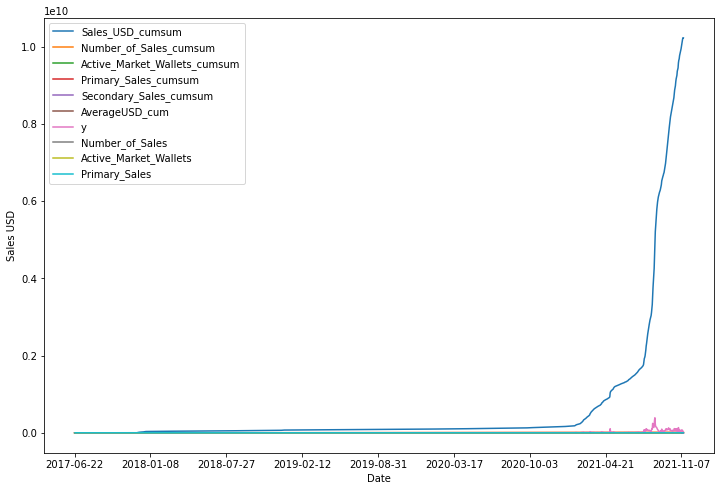

In [3]:
ax = time_series.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

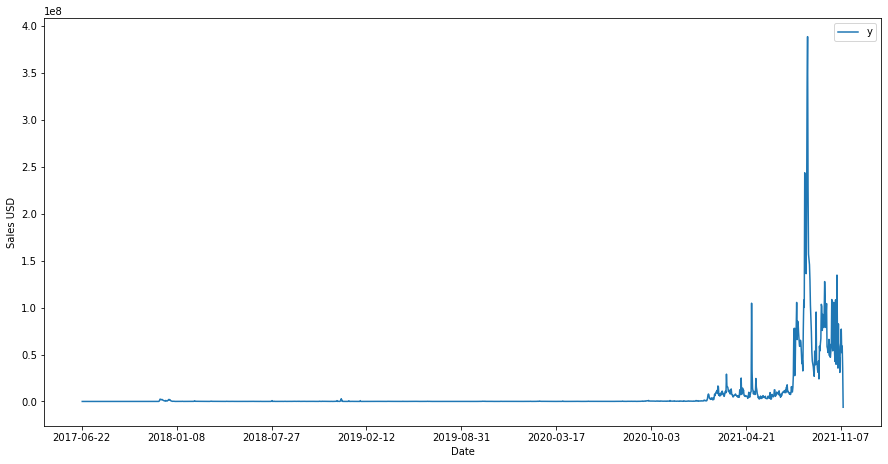

In [78]:
ax = time_series[['ds', 'y']].set_index('ds').plot(figsize=(15, 7.5))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

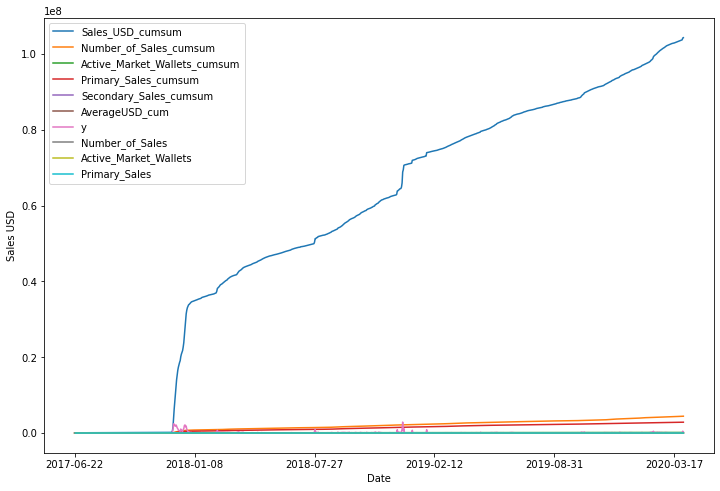

In [4]:
pre_covid = time_series.iloc[:1016,:]
post_covid = time_series.iloc[1016:,:]

pre_covid_clean = pre_covid[['ds', 'y']]

ax = pre_covid.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

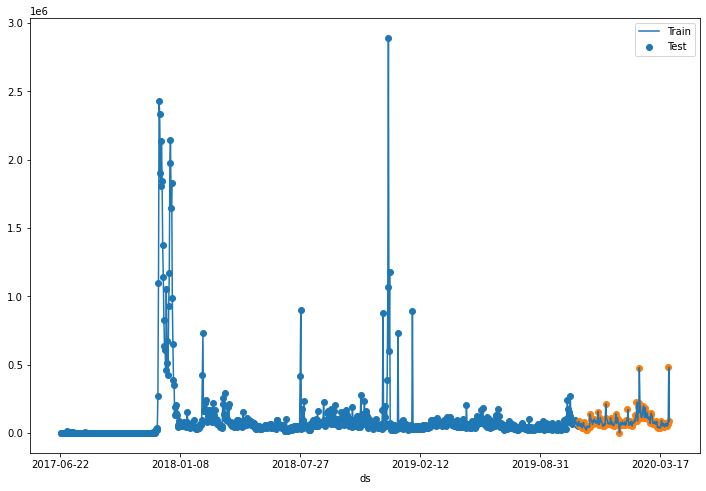

In [6]:
attrs = pre_covid.ds
labels = pre_covid.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.15, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = pre_covid_clean.set_index('ds').plot(figsize=(12, 8))
plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

In [55]:
model = Prophet(interval_width=0.95)
model.fit(train_data)

future = model.make_future_dataframe(periods=152)
#future = model.make_future_dataframe(periods=3, freq='MS')

forecast = model.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast

19:34:04 - cmdstanpy - INFO - Chain [1] start processing
19:34:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2017-06-22,-19930.680740,-435742.788143,382134.937225
1,2017-06-23,4017.376580,-406583.561095,417223.077572
2,2017-06-24,-17854.006503,-408682.701147,369644.492050
3,2017-06-25,-15038.783106,-434678.805046,396937.794739
4,2017-06-26,-23060.972900,-433393.263420,372933.287359
...,...,...,...,...
1010,2020-03-28,114599.874756,-313491.285651,504804.585114
1011,2020-03-29,122966.110569,-284191.946013,521920.901975
1012,2020-03-30,120483.981541,-318683.509714,551860.858133
1013,2020-03-31,114257.227795,-317045.510514,509666.324820


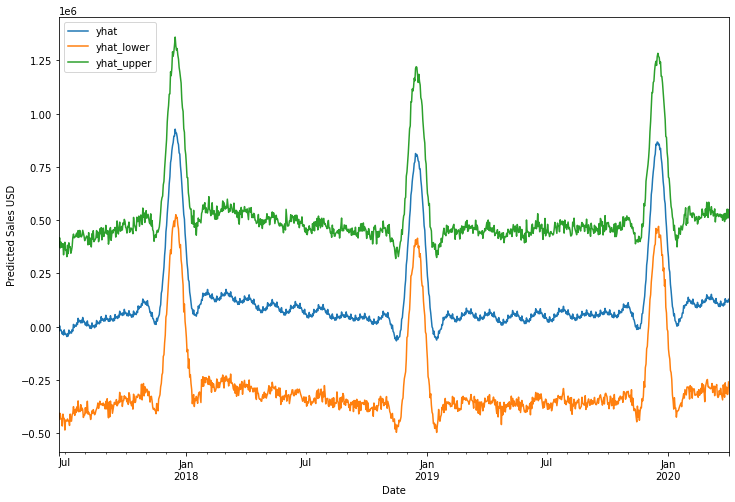

In [56]:
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

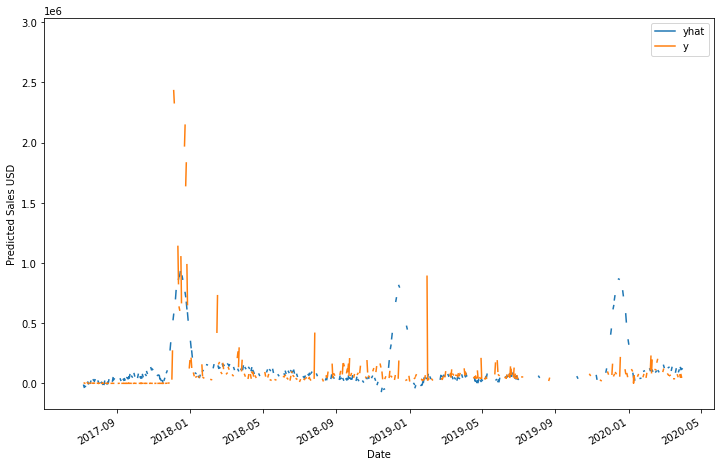

In [57]:
forecast = forecast[['ds', 'yhat']]
dfs = [forecast, pre_covid_clean]
compare = pd.concat(dfs)

ax = compare.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

Seaborn, manipulate data frame, https://linuxhint.com/seaborn-time-series-plot/, 

-------------------------------------------------------------------------------------------------------------------------------


My efforst to fix the above graph

In [58]:
pre_covid_clean

,ds,y
0,2017-06-22,NaN
1,2017-06-23,1020.30
2,2017-06-24,1240.84
3,2017-06-25,517.55
4,2017-06-26,424.63
...,...,...
1011,2020-03-28,72831.83
1012,2020-03-29,51681.42
1013,2020-03-30,67614.46
1014,2020-03-31,480104.11


In [59]:
forecast

,ds,yhat
0,2017-06-22,-19930.680740
1,2017-06-23,4017.376580
2,2017-06-24,-17854.006503
3,2017-06-25,-15038.783106
4,2017-06-26,-23060.972900
...,...,...
1010,2020-03-28,114599.874756
1011,2020-03-29,122966.110569
1012,2020-03-30,120483.981541
1013,2020-03-31,114257.227795


In [60]:
import datetime

In [61]:
pre_covid_clean.ds = pd.to_datetime(pre_covid_clean.ds)

C:\Users\fremo\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
forecast.ds = pd.to_datetime(forecast.ds)

C:\Users\fremo\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [63]:
test = pd.merge_asof(pre_covid_clean,forecast)

In [64]:
test

,ds,y,yhat
0,2017-06-22,NaN,-19930.680740
1,2017-06-23,1020.30,4017.376580
2,2017-06-24,1240.84,-17854.006503
3,2017-06-25,517.55,-15038.783106
4,2017-06-26,424.63,-23060.972900
...,...,...,...
1011,2020-03-28,72831.83,114599.874756
1012,2020-03-29,51681.42,122966.110569
1013,2020-03-30,67614.46,120483.981541
1014,2020-03-31,480104.11,114257.227795


In [65]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(test)

             ds          y        yhat
0    2017-06-22        NaN  -19930.681
1    2017-06-23  1.020e+03    4017.377
2    2017-06-24  1.241e+03  -17854.007
3    2017-06-25  5.176e+02  -15038.783
4    2017-06-26  4.246e+02  -23060.973
5    2017-06-27  2.093e+03  -34601.774
6    2017-06-28  1.247e+03  -25333.456
7    2017-06-29  2.186e+03  -39224.746
8    2017-06-30  1.708e+03  -15242.377
9    2017-07-01  3.141e+03  -36334.235
10   2017-07-02  2.925e+03  -32017.628
11   2017-07-03  7.250e+03  -37861.149
12   2017-07-04  1.351e+04  -46610.402
13   2017-07-05  1.840e+03  -34019.919
14   2017-07-06  7.022e+03  -44156.050
15   2017-07-07  7.083e+03  -16095.560
16   2017-07-08  3.228e+03  -32905.469
17   2017-07-09  9.691e+02  -24227.762
18   2017-07-10  4.910e+03  -25757.530
19   2017-07-11  5.709e+03  -30364.950
20   2017-07-12  1.779e+03  -13923.528
21   2017-07-13  5.301e+03  -20609.498
22   2017-07-14  4.484e+02   10402.773
23   2017-07-15  5.497e+02   -4036.241
24   2017-07-16  3.192e+0

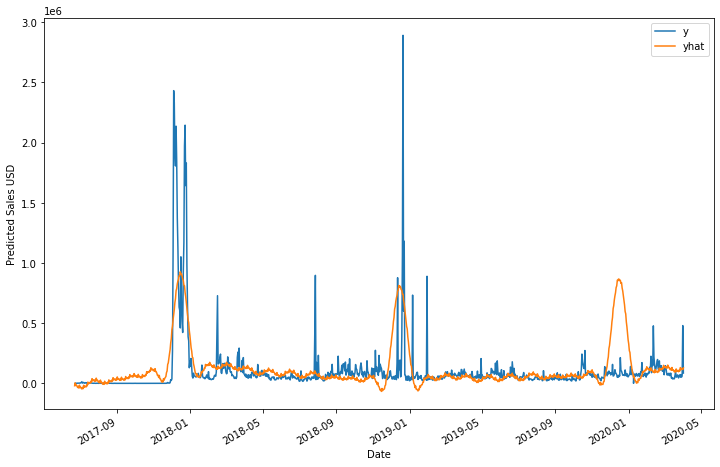

In [66]:
ax = test.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [68]:
testForCalc = test
testForCalc

,ds,y,yhat
0,2017-06-22,NaN,-19930.680740
1,2017-06-23,1020.30,4017.376580
2,2017-06-24,1240.84,-17854.006503
3,2017-06-25,517.55,-15038.783106
4,2017-06-26,424.63,-23060.972900
...,...,...,...
1011,2020-03-28,72831.83,114599.874756
1012,2020-03-29,51681.42,122966.110569
1013,2020-03-30,67614.46,120483.981541
1014,2020-03-31,480104.11,114257.227795


In [69]:
testForCalc = testForCalc.iloc[1:, :]
testForCalc

,ds,y,yhat
1,2017-06-23,1020.30,4017.376580
2,2017-06-24,1240.84,-17854.006503
3,2017-06-25,517.55,-15038.783106
4,2017-06-26,424.63,-23060.972900
5,2017-06-27,2092.91,-34601.773638
...,...,...,...
1011,2020-03-28,72831.83,114599.874756
1012,2020-03-29,51681.42,122966.110569
1013,2020-03-30,67614.46,120483.981541
1014,2020-03-31,480104.11,114257.227795


In [70]:
mean_absolute_error(testForCalc.y, testForCalc.yhat)

98246.44827257875

In [71]:
mean_squared_error(testForCalc.y, testForCalc.yhat)

49100243221.614334

In [72]:
mean_squared_error(testForCalc.y, testForCalc.yhat, squared=False)

221585.7468828136